In [26]:
#Importing necessary libraries
import sklearn.metrics as metrics
import datetime
import re
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import seaborn as sns
from requests import get
import math
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [27]:
#To display all the columns and rows
pd.set_option('display.max_columns', 1000);
pd.set_option('display.max_rows', 1000);
pd.set_option('display.width', 1000);
#To ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#To supress scientific notations
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [28]:
#Reading the data file
df = pd.read_excel("/content/drive/MyDrive/ColabNotebooks/Independent_Study/Depression_Study/updatedData2.xlsx")
#Creating a copy
df_copy = df

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 98 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Y1PPTID                 1024 non-null   int64  
 1   Y1IL6                   985 non-null    float64
 2   Y1CRP                   985 non-null    float64
 3   Y1TNFa                  985 non-null    float64
 4   Y1MCP1                  985 non-null    float64
 5   Y1PTX3                  986 non-null    float64
 6   osteopontin             985 non-null    float64
 7   ngal                    985 non-null    float64
 8   ngalplasmaspecific      985 non-null    float64
 9   st2                     985 non-null    float64
 10  galectin3               985 non-null    float64
 11  gdf15                   985 non-null    float64
 12  Y1Leptin                985 non-null    float64
 13  Y1Insulin               984 non-null    float64
 14  Y1MICROALBUMIN          927 non-null    

<Axes: >

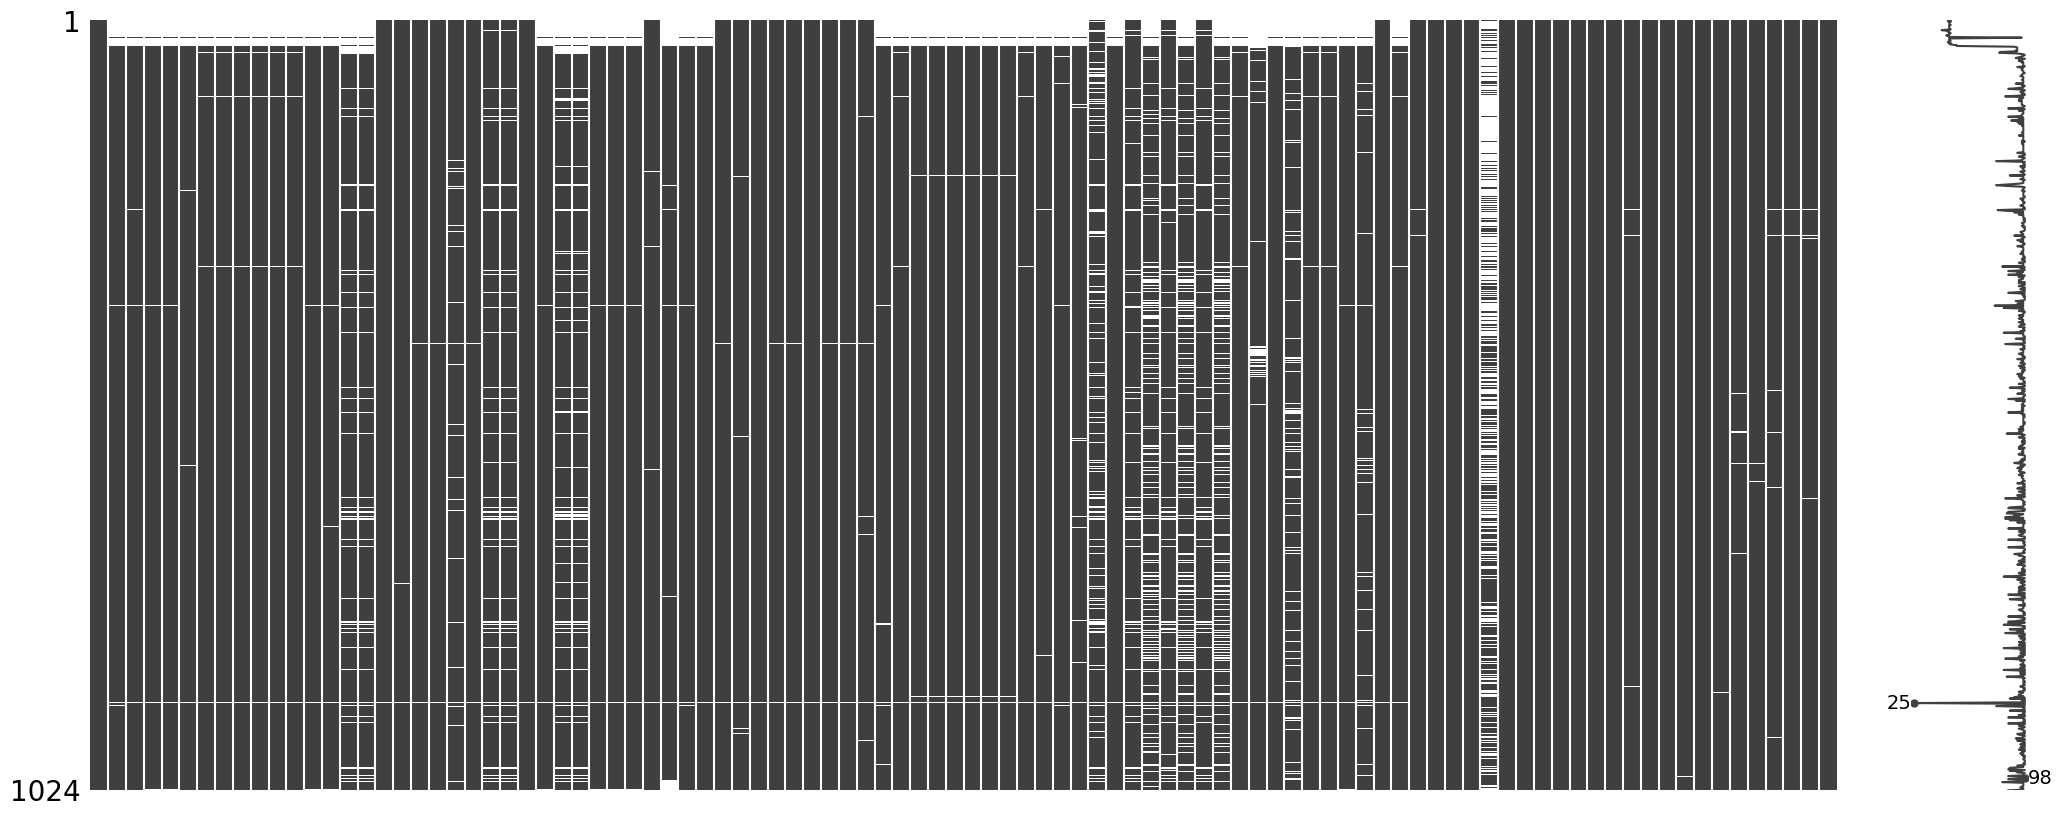

In [30]:
#Visualizing the missing data
import missingno as msno
%matplotlib inline
msno.matrix(df)

<Axes: >

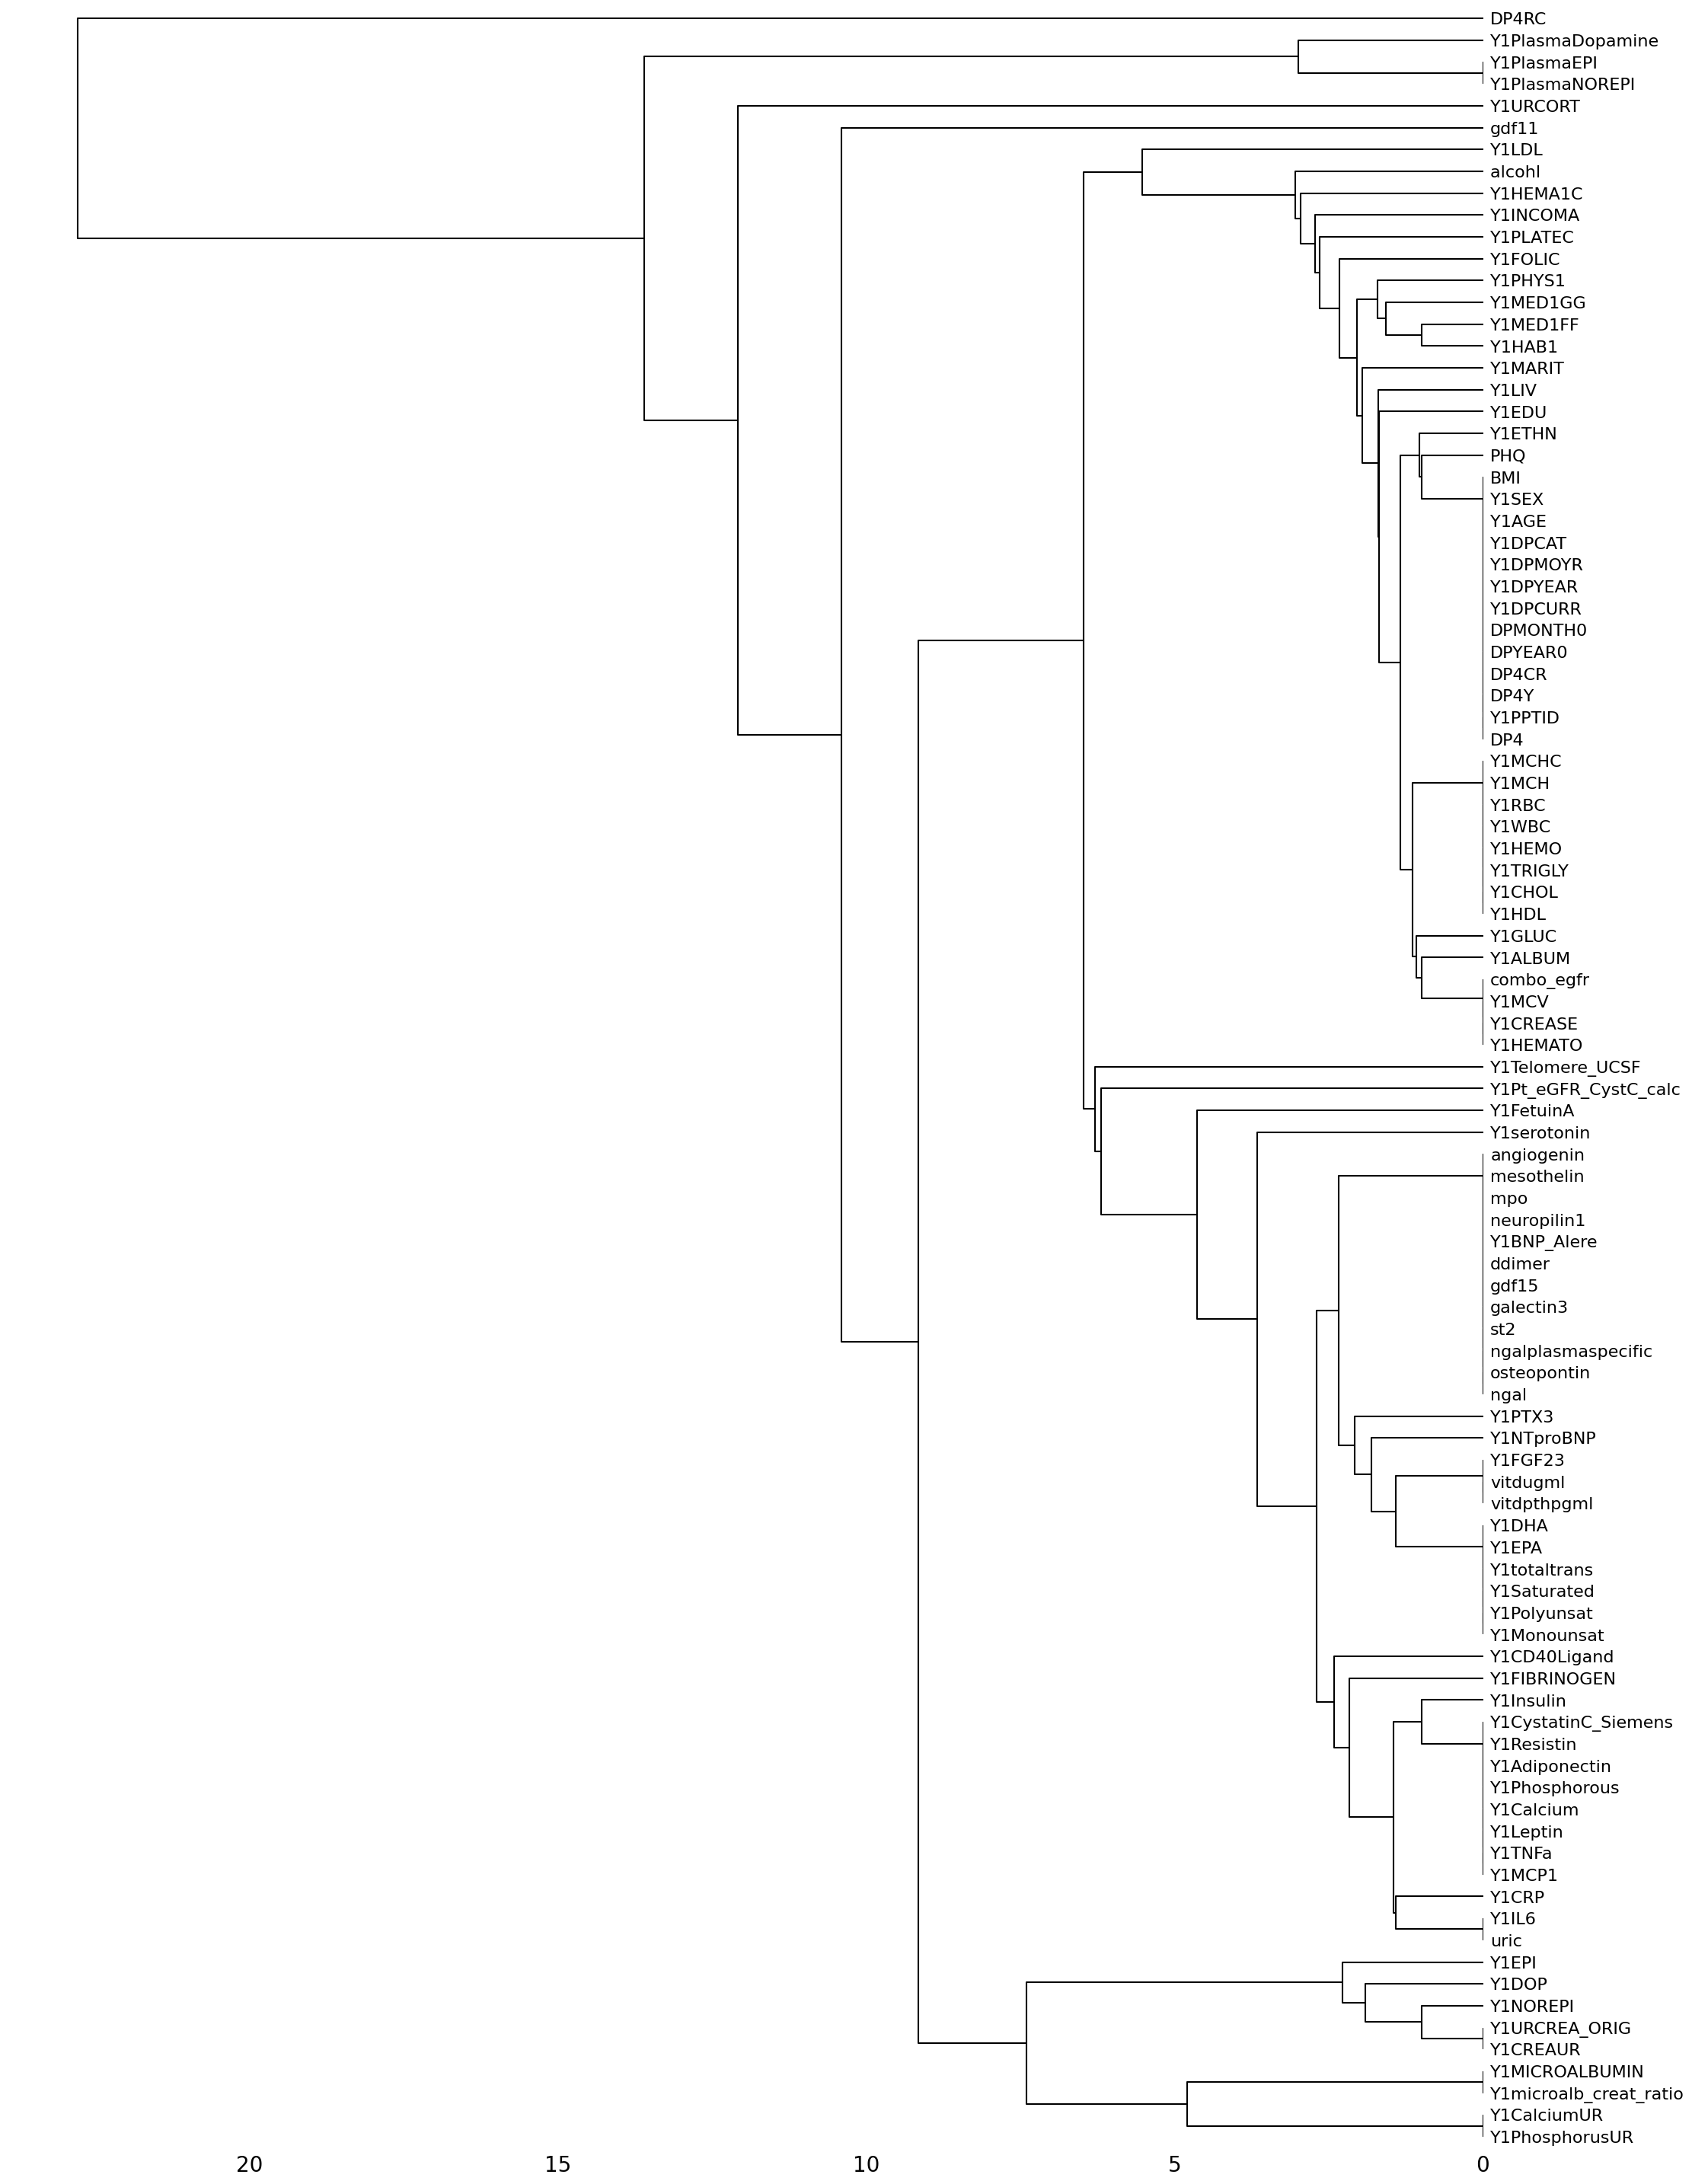

In [31]:
msno.dendrogram(df)

In [32]:
#Dropping the top 5 columns with maximum missing data
df.drop('DP4RC', axis = 1, inplace = True)
df.drop('Y1PlasmaDopamine', axis = 1, inplace = True)
df.drop('Y1PlasmaEPI', axis = 1, inplace = True)
df.drop('Y1PlasmaNOREPI', axis = 1, inplace = True)
df.drop('Y1URCORT', axis = 1, inplace = True)

<Axes: >

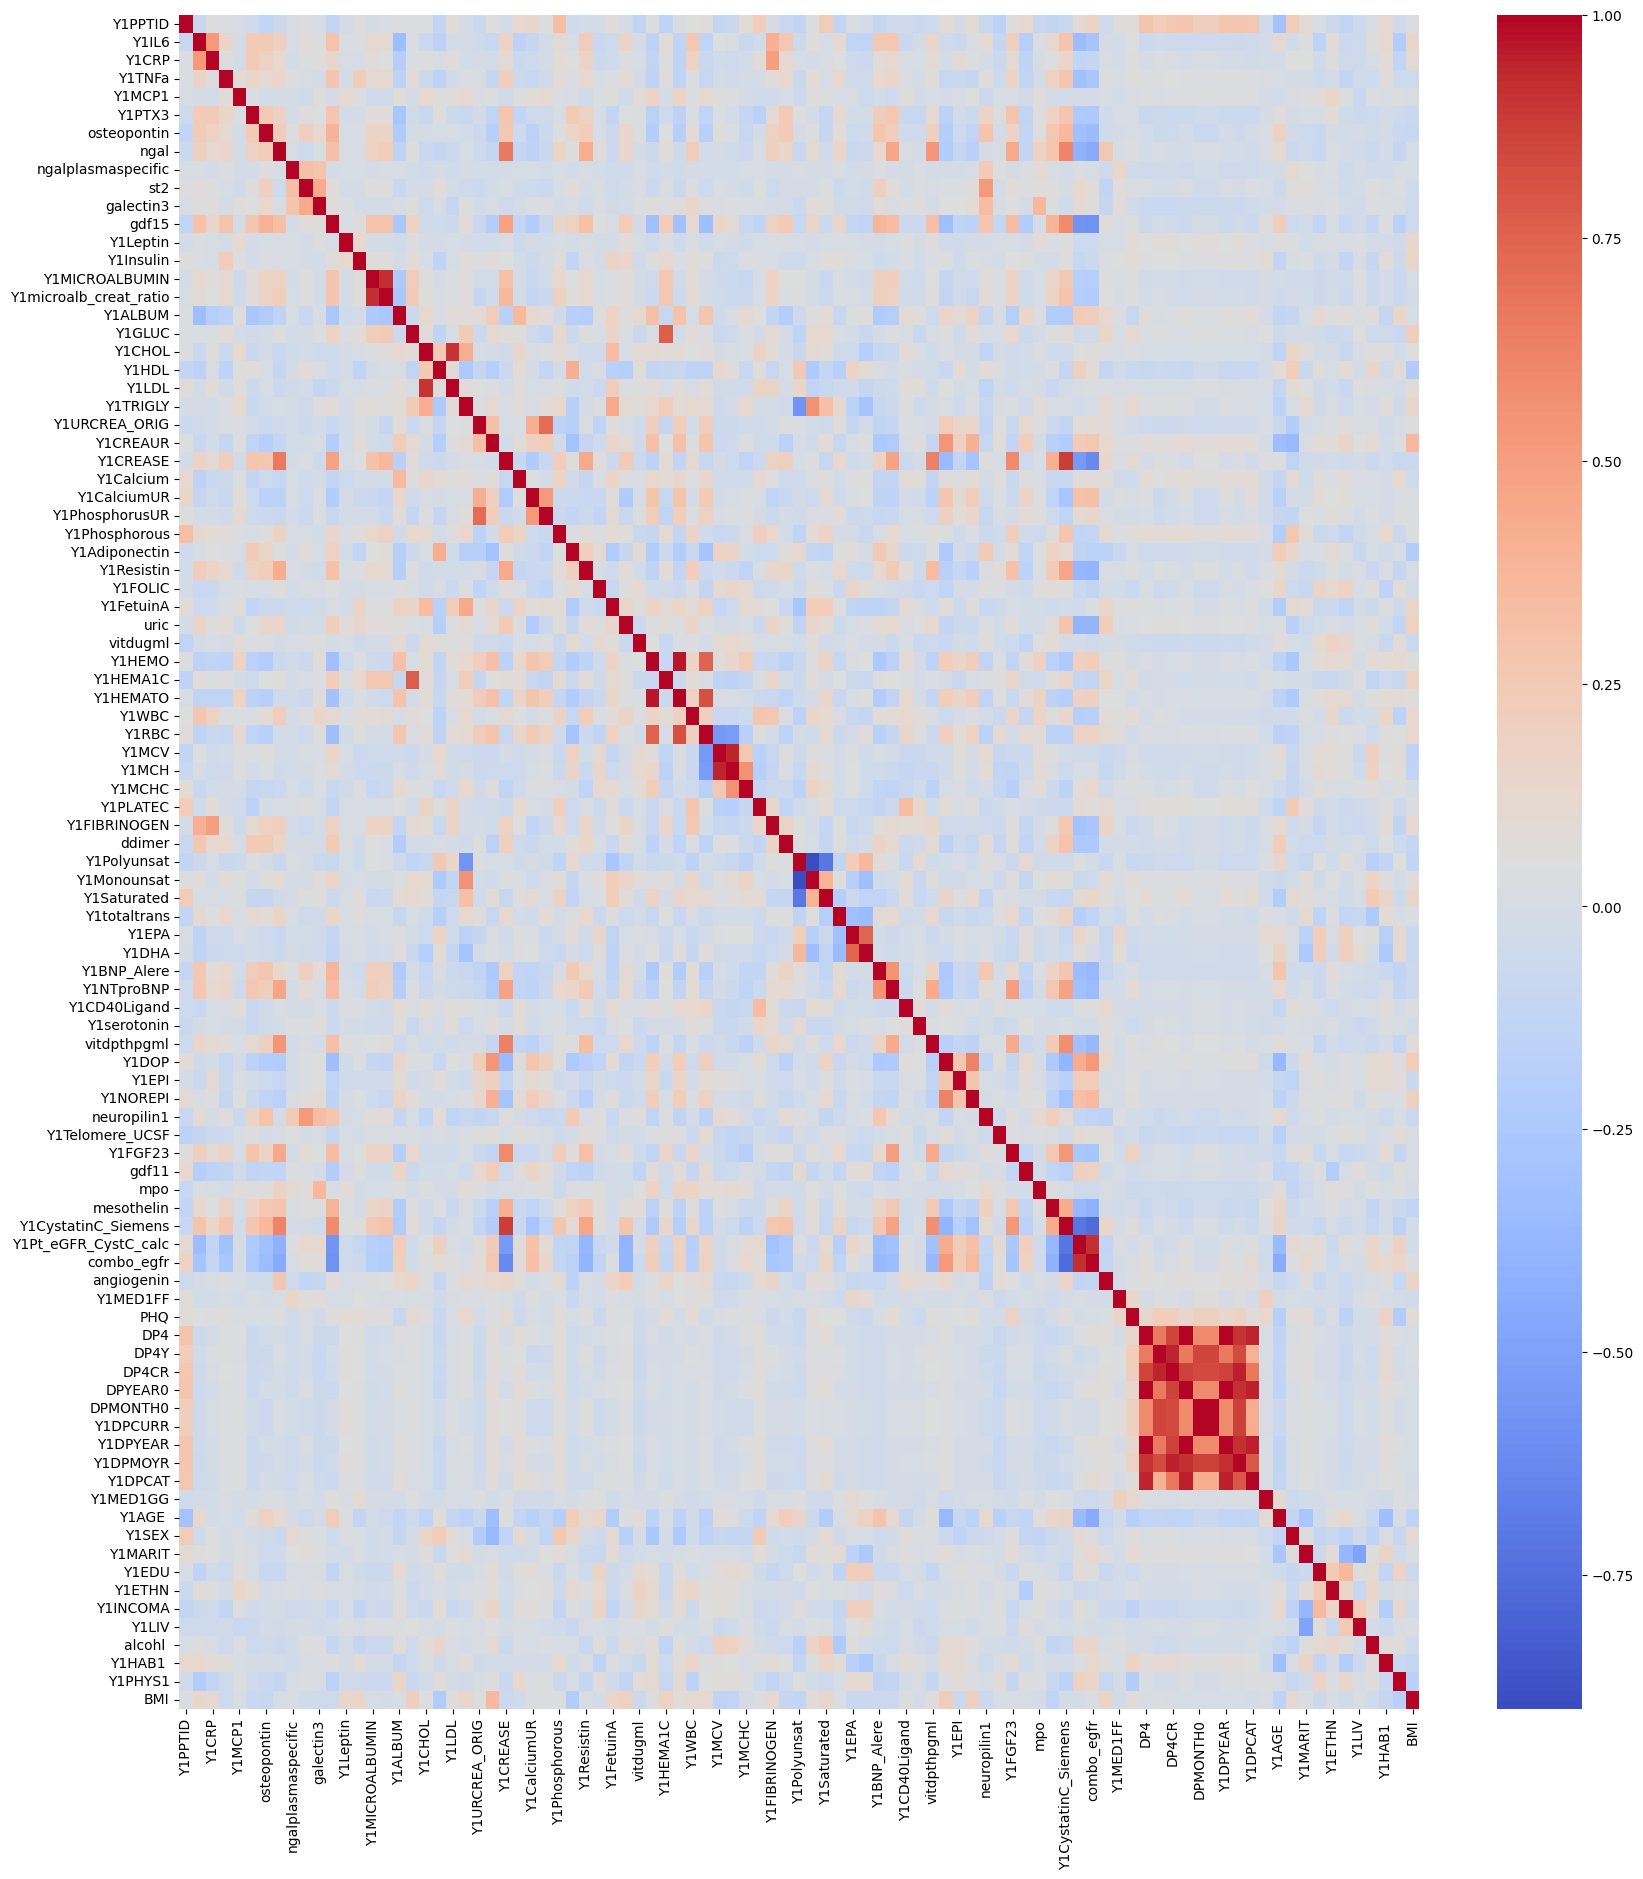

In [33]:
import seaborn as sns
plt.figure(figsize=(20,22))
#Plotting heatmap to understand correlation between variables
sns.heatmap(df.corr(),cmap='coolwarm')

In [34]:
#Checking for duplicate data and removing it
print(df.shape)
df.drop_duplicates()
print(df.shape)

(1024, 93)
(1024, 93)


In [35]:
df1 = df_copy

In [36]:
df1.interpolate(method='linear', axis=0, limit_direction='forward', inplace=True)

In [37]:
#Getting missing data in the dataset
df1.isna().sum()

,0
Y1PPTID,0
Y1IL6,23
Y1CRP,23
Y1TNFa,23
Y1MCP1,23
Y1PTX3,23
osteopontin,23
ngal,23
ngalplasmaspecific,23
st2,23


In [38]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(random_state=42)
imputed = imputer.fit_transform(df1)
df1_imputed = pd.DataFrame(imputed, columns=df1.columns)

In [39]:
from sklearn.impute import KNNImputer
# creating a data frame from the list
Before_imputation = pd.DataFrame(df_copy)
#print dataset before imputation
#print("Data Before performing imputation\n",Before_imputation)

# create an object for KNNImputer
imputer = KNNImputer(n_neighbors=2)
After_imputation = imputer.fit_transform(Before_imputation)
# print dataset after performing the operation
#print("\n\nAfter performing imputation\n",After_imputation)

In [40]:
#Getting missing data in the dataset
df_copy.isna().sum()

,0
Y1PPTID,0
Y1IL6,23
Y1CRP,23
Y1TNFa,23
Y1MCP1,23
Y1PTX3,23
osteopontin,23
ngal,23
ngalplasmaspecific,23
st2,23


In [41]:
df = df.fillna(df.median())

In [42]:
#Getting missing data in the dataset
df.isna().sum()

,0
Y1PPTID,0
Y1IL6,0
Y1CRP,0
Y1TNFa,0
Y1MCP1,0
Y1PTX3,0
osteopontin,0
ngal,0
ngalplasmaspecific,0
st2,0


In [43]:
#Checking count of both the labels
count = df.PHQ.value_counts()
count

,count
PHQ,
0.000,825
1.000,199


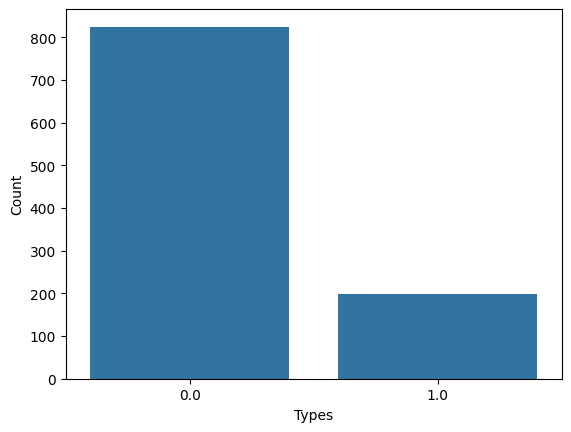

In [44]:
#Checking for class imbalance
sns.barplot(x=count.index, y=count)
plt.xlabel('Types')
plt.ylabel('Count');

In [45]:
#Scaling the data into 0-1
X = df.drop(['PHQ'], axis=1)
y = df['PHQ']
from sklearn.preprocessing import MinMaxScaler
scal = MinMaxScaler()
X = scal.fit_transform(X)
X

array([[0.00000000e+00, 1.53068407e-01, 1.69195751e-02, ...,
        0.00000000e+00, 8.00000000e-01, 2.69344494e-01],
       [9.71817298e-04, 1.53068407e-01, 1.69195751e-02, ...,
        0.00000000e+00, 2.00000000e-01, 3.29925607e-01],
       [1.94363460e-03, 1.53068407e-01, 1.69195751e-02, ...,
        0.00000000e+00, 6.00000000e-01, 1.77621340e-01],
       ...,
       [9.98056365e-01, 8.92045818e-02, 2.10925645e-02, ...,
        0.00000000e+00, 0.00000000e+00, 5.00685319e-01],
       [9.99028183e-01, 3.86830486e-01, 1.83611533e-02, ...,
        0.00000000e+00, 0.00000000e+00, 2.79059966e-01],
       [1.00000000e+00, 1.07506239e-01, 3.57359636e-02, ...,
        0.00000000e+00, 8.00000000e-01, 3.20541041e-01]])

In [46]:
#Splitting the data set into 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

0.7946927374301676
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85       241
         1.0       0.44      0.31      0.37        67

    accuracy                           0.76       308
   macro avg       0.63      0.60      0.61       308
weighted avg       0.74      0.76      0.75       308

Area Under the Curve 0.6006998204000743
Confusion Matrix : 
[[214  27]
 [ 46  21]]


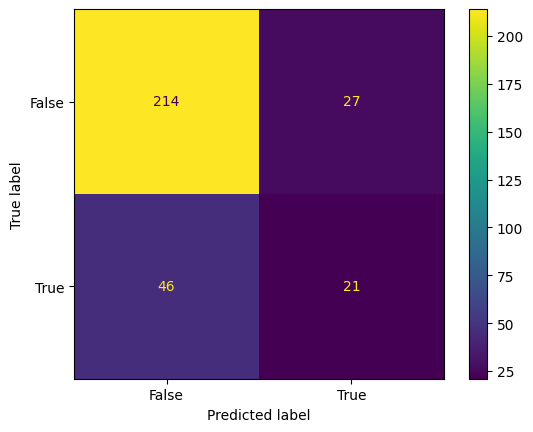

In [47]:
#1. NAIVE BAYES without any sampling
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# fiting the model to data
gnb.fit(X_train, y_train)
print(gnb.score(X_train,y_train))
# get predictions
y_pred_gnb = gnb.predict(X_test)
#Import scikit-learn metrics module for clasification report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred_gnb))
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_gnb)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_gnb)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

0.8589385474860335
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.81      0.97      0.88       241
         1.0       0.62      0.19      0.30        67

    accuracy                           0.80       308
   macro avg       0.72      0.58      0.59       308
weighted avg       0.77      0.80      0.75       308

Area Under the Curve 0.5804174149996902
Confusion Matrix : 
[[233   8]
 [ 54  13]]


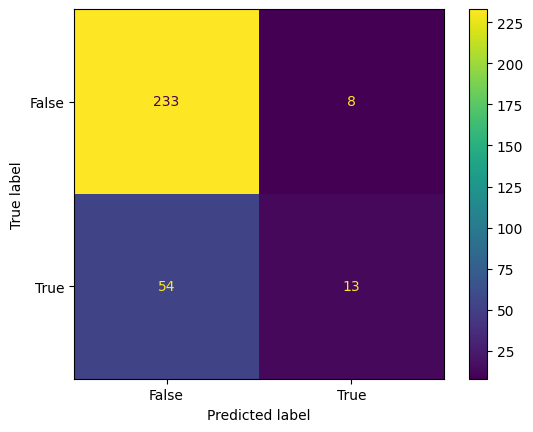

In [48]:
#2. LOGISTIC REGRESSION without any sampling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression(solver='newton-cg',)
# fiting the model to data
lr.fit(X_train, y_train)
print(lr.score(X_train,y_train))
y_pred_lr = lr.predict(X_test)
#print(y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_lr)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

-1936.8213222432655
              precision    recall  f1-score   support

         0.0       0.72      0.44      0.55       241
         1.0       0.16      0.39      0.23        67

    accuracy                           0.43       308
   macro avg       0.44      0.42      0.39       308
weighted avg       0.60      0.43      0.48       308

Area Under the Curve 0.41602155199108193
Confusion Matrix : 
[[107 134]
 [ 41  26]]


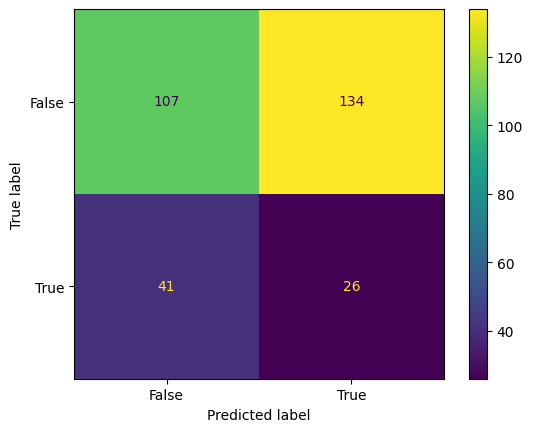

In [49]:
#3. K-MEANS CLUSTERING without the sampling
from sklearn.cluster import KMeans
km = KMeans(n_clusters= 2)
# fiting the model to data
km.fit(X_train,y_train)
print(km.score(X_train,y_train))
# get predictions
y_pred_km = km.predict(X_test)
#Import scikit-learn metrics module for clasification report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred_km))
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_km)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_km)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

Hence we can see that missing data supportive algorithms are not performing with high accuracy. Therefore, we are going with logistic regression at this point.

In [50]:
#1. Random Undersampling
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
#current class distribution
print(Counter(y_train))
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy=0.7)
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X_train, y_train)
# summarize class distribution after undersampling
print(Counter(y_under))

Counter({0.0: 584, 1.0: 132})
Counter({0.0: 188, 1.0: 132})


0.80625
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.89      0.80      0.84       241
         1.0       0.47      0.64      0.54        67

    accuracy                           0.77       308
   macro avg       0.68      0.72      0.69       308
weighted avg       0.80      0.77      0.78       308

Area Under the Curve 0.7213104601473957
Confusion Matrix : 
[[193  48]
 [ 24  43]]


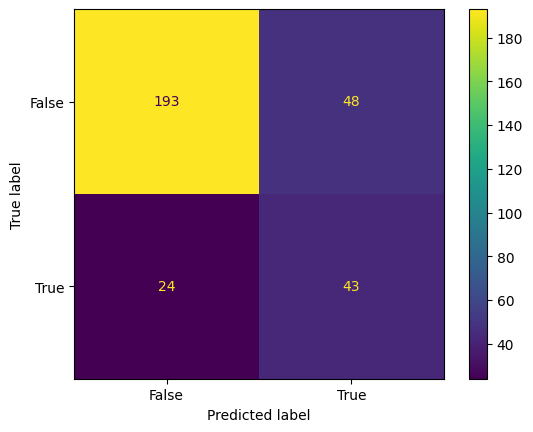

In [51]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression(solver='newton-cg',)
# fiting the model to data
lr.fit(X_under, y_under)
print(lr.score(X_under,y_under))
y_pred_lr = lr.predict(X_test)
#print(y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_lr)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [52]:
#2. Undersampling using cluster centroids
from collections import Counter
from imblearn.under_sampling import ClusterCentroids
#current class distribution
print(Counter(y_train))
# define undersample strategy
cc = ClusterCentroids(random_state=42)
# fit and apply the transform
X_undercc, y_undercc = cc.fit_resample(X_train, y_train)
# summarize class distribution after undersampling
print(Counter(y_undercc))

Counter({0.0: 584, 1.0: 132})
Counter({0.0: 132, 1.0: 132})


0.7310606060606061
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.86      0.68      0.76       241
         1.0       0.34      0.60      0.44        67

    accuracy                           0.67       308
   macro avg       0.60      0.64      0.60       308
weighted avg       0.75      0.67      0.69       308

Area Under the Curve 0.6408311141388493
Confusion Matrix : 
[[165  76]
 [ 27  40]]


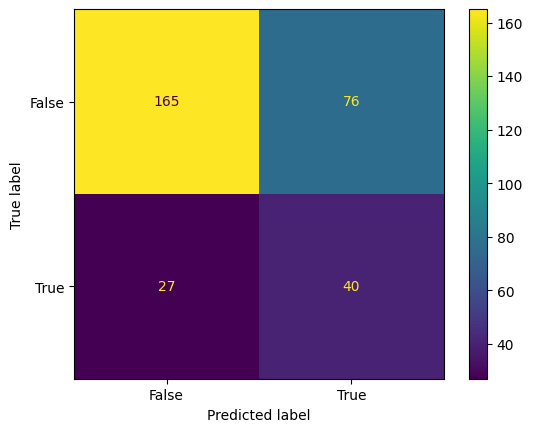

In [53]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression(solver='newton-cg',)
# fiting the model to data
lr.fit(X_undercc, y_undercc)
print(lr.score(X_undercc,y_undercc))
y_pred_lr = lr.predict(X_test)
#print(y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_lr)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [54]:
#3. Undersampling using TomekLinks
from collections import Counter
from imblearn.under_sampling import TomekLinks
#current class distribution
print(Counter(y_train))
# define undersample strategy
tl = TomekLinks()
# fit and apply the transform
X_undertl, y_undertl = tl.fit_resample(X_train, y_train)
# summarize class distribution after undersampling
print(Counter(y_undertl))

Counter({0.0: 584, 1.0: 132})
Counter({0.0: 563, 1.0: 132})


0.8546762589928057
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.81      0.97      0.88       241
         1.0       0.64      0.21      0.31        67

    accuracy                           0.80       308
   macro avg       0.73      0.59      0.60       308
weighted avg       0.78      0.80      0.76       308

Area Under the Curve 0.5878801015668544
Confusion Matrix : 
[[233   8]
 [ 53  14]]


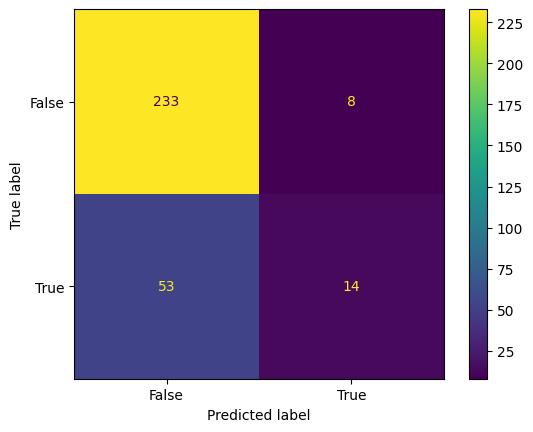

In [55]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression(solver='newton-cg',)
# fiting the model to data
lr.fit(X_undertl, y_undertl)
print(lr.score(X_undertl,y_undertl))
y_pred_lr = lr.predict(X_test)
#print(y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_lr)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [56]:
#4. Random Oversampling
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
#current class distribution
print(Counter(y_train))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy=0.7)
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)
# summarize class distribution after oversampling
print(Counter(y_over))

Counter({0.0: 584, 1.0: 132})
Counter({0.0: 584, 1.0: 408})


0.7772177419354839
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86       241
         1.0       0.51      0.51      0.51        67

    accuracy                           0.79       308
   macro avg       0.69      0.69      0.69       308
weighted avg       0.79      0.79      0.79       308

Area Under the Curve 0.6852666129931257
Confusion Matrix : 
[[208  33]
 [ 33  34]]


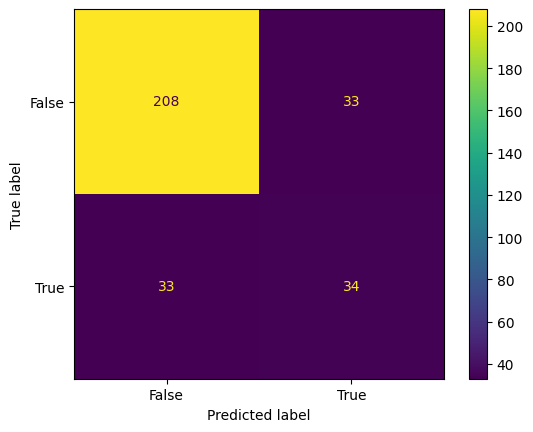

In [57]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression(solver='newton-cg',)
# fiting the model to data
lr.fit(X_over, y_over)
print(lr.score(X_over,y_over))
y_pred_lr = lr.predict(X_test)
#print(y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_lr)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [58]:
#5. Oversampling using SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE
#current class distribution
print(Counter(y_train))
# define oversample strategy
sm = SMOTE(random_state=42)
# fit and apply the transform
X_oversm, y_oversm = sm.fit_resample(X_train, y_train)
# summarize class distribution after oversampling
print(Counter(y_train))

Counter({0.0: 584, 1.0: 132})
Counter({0.0: 584, 1.0: 132})


0.7808219178082192
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.88      0.73      0.80       241
         1.0       0.40      0.66      0.50        67

    accuracy                           0.71       308
   macro avg       0.64      0.69      0.65       308
weighted avg       0.78      0.71      0.73       308

Area Under the Curve 0.6935034371709916
Confusion Matrix : 
[[176  65]
 [ 23  44]]


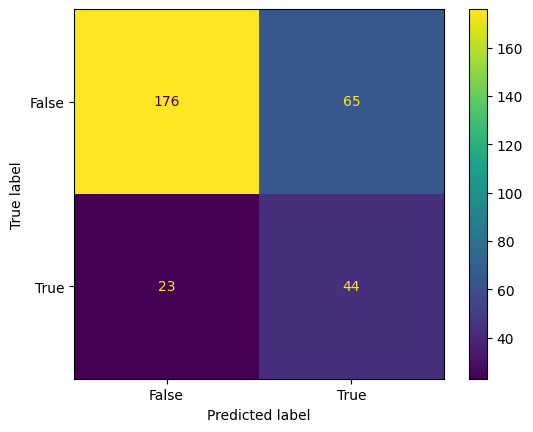

In [59]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression(solver='newton-cg',)
# fiting the model to data
lr.fit(X_oversm, y_oversm)
print(lr.score(X_oversm,y_oversm))
y_pred_lr = lr.predict(X_test)
#print(y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_lr)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [60]:
#6. Oversampling using ADASYN
from collections import Counter
from imblearn.over_sampling import ADASYN
#current class distribution
print(Counter(y_train))
# define oversample strategy
ad = ADASYN(random_state=42)
# fit and apply the transform
X_overad, y_overad = ad.fit_resample(X_train, y_train)
# summarize class distribution after oversampling
print(Counter(y_overad))

Counter({0.0: 584, 1.0: 132})
Counter({1.0: 593, 0.0: 584})


0.7790994052676296
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.88      0.73      0.80       241
         1.0       0.39      0.64      0.49        67

    accuracy                           0.71       308
   macro avg       0.64      0.68      0.64       308
weighted avg       0.77      0.71      0.73       308

Area Under the Curve 0.6839660618071468
Confusion Matrix : 
[[175  66]
 [ 24  43]]


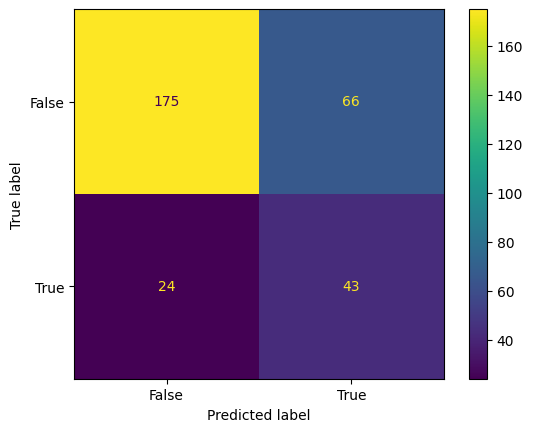

In [61]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression(solver='newton-cg',)
# fiting the model to data
lr.fit(X_overad, y_overad)
print(lr.score(X_overad,y_overad))
y_pred_lr = lr.predict(X_test)
#print(y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_lr)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [62]:
#7. Oversampling with undersampling using SMOTETomek
from collections import Counter
from imblearn.combine import SMOTETomek
#current class distribution
print(Counter(y_train))
# define oversample strategy
smt = SMOTETomek(random_state=42)
# fit and apply the transform
X_oversmt, y_oversmt = smt.fit_resample(X_train, y_train)
# summarize class distribution after oversampling
print(Counter(y_oversmt))

Counter({0.0: 584, 1.0: 132})
Counter({0.0: 584, 1.0: 584})


0.7808219178082192
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.88      0.73      0.80       241
         1.0       0.40      0.66      0.50        67

    accuracy                           0.71       308
   macro avg       0.64      0.69      0.65       308
weighted avg       0.78      0.71      0.73       308

Area Under the Curve 0.6935034371709916
Confusion Matrix : 
[[176  65]
 [ 23  44]]


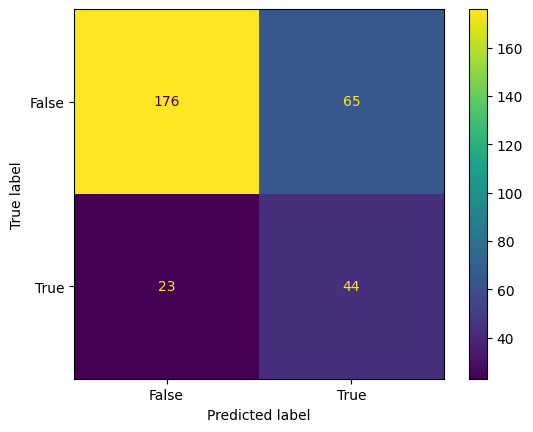

In [63]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression(solver='newton-cg',)
# fiting the model to data
lr.fit(X_oversmt, y_oversmt)
print(lr.score(X_oversmt,y_oversmt))
y_pred_lr = lr.predict(X_test)
#print(y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_lr)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

1.0
              precision    recall  f1-score   support

         0.0       0.80      0.95      0.87       241
         1.0       0.48      0.16      0.24        67

    accuracy                           0.78       308
   macro avg       0.64      0.56      0.56       308
weighted avg       0.73      0.78      0.73       308

Area Under the Curve 0.55719328667864
Confusion Matrix : 
[[229  12]
 [ 56  11]]


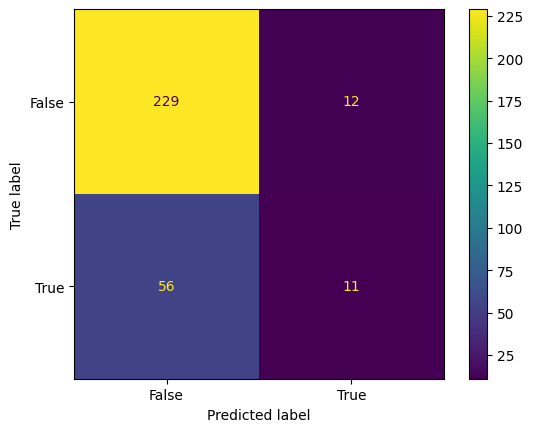

In [65]:
# XGBOOST - boosting algorithm
import xgboost as xgb
from sklearn.metrics import auc, accuracy_score
xgb_model = xgb.XGBClassifier()
# fiting the model to data
xgb_model.fit(X_train, y_train)
print(xgb_model.score(X_train,y_train))
# get predictions
y_pred_boost = xgb_model.predict(X_test)
#Import scikit-learn metrics module for clasification report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred_boost))
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_boost)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_boost)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

0.8156424581005587
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88       241
         1.0       0.00      0.00      0.00        67

    accuracy                           0.78       308
   macro avg       0.39      0.50      0.44       308
weighted avg       0.61      0.78      0.69       308

Area Under the Curve 0.5
Confusion Matrix : 
[[241   0]
 [ 67   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


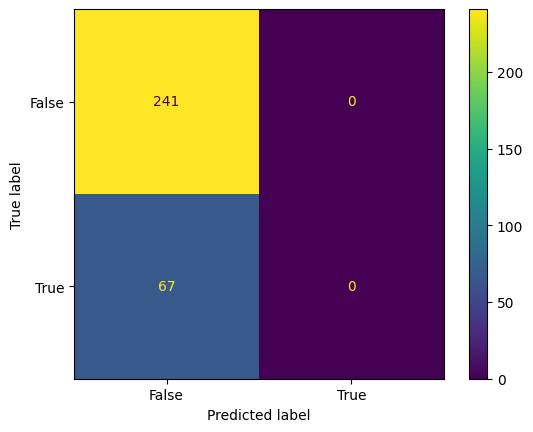

In [66]:
# RANDOM FOREST CLASSIFIER - bagging algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier(max_depth=2, random_state=0)
# fiting the model to data
rf.fit(X_train, y_train)
print(rf.score(X_train,y_train))
y_pred_rf = rf.predict(X_test)
clf_report = classification_report(y_test, y_pred_rf)
print(f"Classification Report : \n{clf_report}")
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_rf)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_rf)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()